In [1]:
%pylab inline
import os
import numpy as np
from regli import Regli
from regli.regli import rand_pos
from corner import corner
from joblib import Parallel, delayed, dump, load
os.chdir('/home/cham/PycharmProjects/regli/regli/data/')

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams.update({"font.size":15})

## load data

In [3]:
# dumped data:
#
# dump(r, 
#      '/home/cham/PycharmProjects/regli/regli/data/regli_lamostdr5_data_snr60_200_star5000_0p80.dump')
# dump((test_flux_norm, test_ivar_norm, test_err_norm, test_labels),
#      '/home/cham/PycharmProjects/regli/regli/data/test_data.dump')

r = load('/home/cham/PycharmProjects/regli/regli/data/regli_lamostdr5_data_snr60_200_star5000_0p80.dump')
test_flux_norm, test_ivar_norm, test_err_norm, test_labels = \
    load('/home/cham/PycharmProjects/regli/regli/data/test_data.dump')

In [4]:
r

==== regli.Regli instance ====
grid shape:  (66, 27, 20)
value shape: (35640, 1900)

## without prior

@Regli.best_match:  [5.97651318e+03 4.32899990e+00 1.92684199e-01]
@Regli: using the default gaissian *lnlike* function...
@Regli: No prior is adopted ...
@Regli: running burn-in [200]...
@Regli: running burn-in [300]...
@Regli: running chains [3000]...
max likelihood  [5.95609590e+03 4.24568259e+00 1.99743965e-01]
test label      [5.948e+03 4.226e+00 1.900e-01]


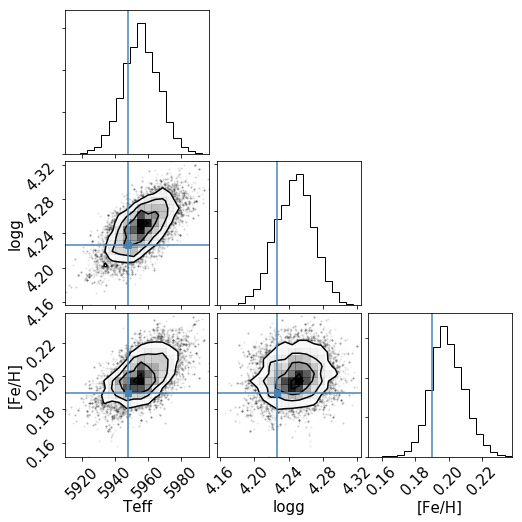

In [5]:
i_test = 668

# run MCMC
sampler = r.run_mcmc(test_flux_norm[i_test], obs_err=test_err_norm[i_test], p0=None,
                     n_burnin=(200,300), n_step=3000, lnlike=None, lnprior=None, pos_eps=0.01, full=False)

# result values
truths=sampler.flatchain[np.argmax(sampler.flatlnprobability)]
print("max likelihood ", truths)
print("test label     ", test_labels[i_test])

# corner plot
fig = corner(sampler.flatchain, truths=test_labels[i_test], labels=["Teff", "logg", "[Fe/H]"])

## with prior

@Regli.best_match:  [5.97651318e+03 4.32899990e+00 1.92684199e-01]
@Regli: using the default gaissian *lnlike* function...
@Regli: using user-defined *lnprior* function...
@Regli: running burn-in [200]...
@Regli: running burn-in [300]...
@Regli: running chains [3000]...
max likelihood  [5.95591788e+03 4.24564765e+00 1.99557246e-01]
test label      [5.948e+03 4.226e+00 1.900e-01]


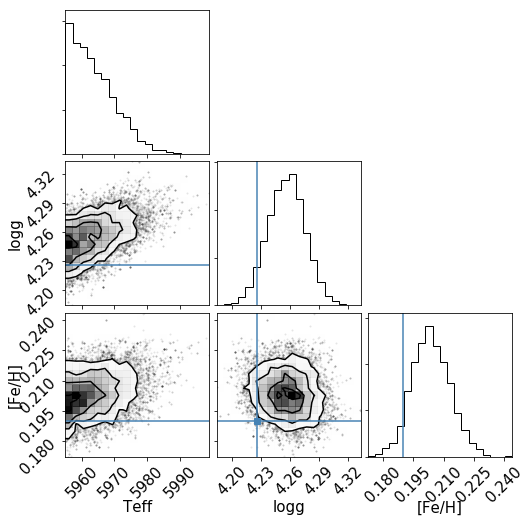

In [6]:
# define your prior
def lnprior(x):
    if 5955<=x[0]<=6000:
        return 0
    else:
        return -np.inf

i_test = 668

# run MCMC
sampler = r.run_mcmc(test_flux_norm[i_test], obs_err=test_err_norm[i_test], p0=None,
                     n_burnin=(200,300), n_step=3000, lnlike=None, lnprior=lnprior, pos_eps=0.01, full=False)

# result values
truths=sampler.flatchain[np.argmax(sampler.flatlnprobability)]
print("max likelihood ", truths)
print("test label     ", test_labels[i_test])

# corner plot
fig = corner(sampler.flatchain, truths=test_labels[i_test], labels=["Teff", "logg", "[Fe/H]"])